# Selección de características

Técnica utilizada para eliminar características que sean estadísticamente redundantes o aporten poca información a los modelos. Como consecuencia, suelen disminuir tiempos de entrenamiento de modelos con muchas características e incluso mejorar sus resultados.

## Métodos de filtro

Usan estadísticos para determinar umbrales sobre los que elegir características. Suelen ser más rápidos que otros métodos, mas no suelen incluir interacción entre variables.

### ANOVA de valor $F$

Determina linealidad entre variables de entrada y salida. Un valor $F$ alto, indica alta relación lineal; valores menores, lo contrario.

Primero cargamos los paquetes.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

Luego los datos.

In [2]:
df_pollutants_coords = pd.read_csv('../data/results/df_pollutants_coords.csv')
df_pollutants_coords.timestamp = pd.to_datetime(df_pollutants_coords.timestamp)
df_pollutants_coords.dropna(inplace = True)
df_pollutants_coords

,station,abbr,lat,lon,h,timestamp,CO,NO,NO2,NOX,...,PM10,PM2_5,BP,RF,RH,SO2,SR,T,WV,WD
1420,Centro,C,25.670,-100.338,560,2017-03-01 04:00:00,2.48,3.7,13.6,17.3,...,98.0,34.0,709.4,0.0,56.0,4.0,0.003,22.43,1.7,256.0
1421,Centro,C,25.670,-100.338,560,2017-03-01 05:00:00,2.40,2.5,10.9,13.4,...,87.0,33.0,709.5,0.0,61.0,3.8,0.003,21.78,1.5,242.0
1422,Centro,C,25.670,-100.338,560,2017-03-01 06:00:00,2.41,3.1,11.8,14.8,...,81.0,77.0,709.9,0.0,60.0,3.9,0.003,21.59,1.9,235.0
1426,Centro,C,25.670,-100.338,560,2017-03-01 10:00:00,2.57,5.8,8.5,14.3,...,158.0,23.0,712.3,0.0,35.0,3.8,0.308,25.93,12.2,34.0
1427,Centro,C,25.670,-100.338,560,2017-03-01 11:00:00,2.39,4.0,5.1,9.1,...,268.0,167.0,713.3,0.0,29.0,3.6,0.626,26.21,13.7,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341276,Suroeste2,SO2,25.665,-100.413,636,2019-12-17 09:00:00,2.01,1.1,1.0,2.1,...,19.0,4.0,717.5,0.0,44.0,3.0,0.033,9.17,3.8,88.0
341279,Suroeste2,SO2,25.665,-100.413,636,2019-12-17 12:00:00,2.05,1.2,1.0,2.2,...,37.0,7.0,717.6,0.0,36.0,2.7,0.468,11.31,2.6,77.0
341302,Suroeste2,SO2,25.665,-100.413,636,2019-12-18 11:00:00,2.06,1.0,1.1,2.1,...,32.0,6.0,718.9,0.0,27.0,5.1,0.443,8.63,0.7,69.0
341303,Suroeste2,SO2,25.665,-100.413,636,2019-12-18 12:00:00,2.05,1.0,1.3,2.3,...,37.0,4.0,718.6,0.0,25.0,9.0,0.532,9.65,0.8,70.0


Para esta sesión, se busca explicar el contaminante $\text{PM}_{10}$ como $Y$ a partir de las variables atmosféricas $X$, independientes del tiempo y geolocalización.

In [3]:
y = df_pollutants_coords[['PM10']]
y

,PM10
1420,98.0
1421,87.0
1422,81.0
1426,158.0
1427,268.0
...,...
341276,19.0
341279,37.0
341302,32.0
341303,37.0


In [4]:
x = df_pollutants_coords[['BP', 'RF', 'RH', 'SO2', 'SR', 'T', 'WV',
       'WD']]
x

,BP,RF,RH,SO2,SR,T,WV,WD
1420,709.4,0.0,56.0,4.0,0.003,22.43,1.7,256.0
1421,709.5,0.0,61.0,3.8,0.003,21.78,1.5,242.0
1422,709.9,0.0,60.0,3.9,0.003,21.59,1.9,235.0
1426,712.3,0.0,35.0,3.8,0.308,25.93,12.2,34.0
1427,713.3,0.0,29.0,3.6,0.626,26.21,13.7,25.0
...,...,...,...,...,...,...,...,...
341276,717.5,0.0,44.0,3.0,0.033,9.17,3.8,88.0
341279,717.6,0.0,36.0,2.7,0.468,11.31,2.6,77.0
341302,718.9,0.0,27.0,5.1,0.443,8.63,0.7,69.0
341303,718.6,0.0,25.0,9.0,0.532,9.65,0.8,70.0


En Python se puede usar `f_regression` para calcular el valor $F$ en regresiones, mientras que `f_classif` se usa para clasificaciones.

In [5]:
from sklearn.feature_selection import f_regression

In [6]:
f_value = f_regression(x, y)
# Regresa arreglo de estadístico F y valor p
f_value

(array([3.29852370e-01, 1.15471724e+01, 5.13188404e+02, 6.88147931e+01,
        4.09850418e+02, 1.57429300e+01, 6.92115543e+01, 4.29422142e+02]),
 array([5.65753240e-001, 6.80000037e-004, 4.79151640e-112, 1.15745704e-016,
        4.01860493e-090, 7.28410824e-005, 9.47261733e-017, 2.76390770e-094]))

In [7]:
df_results = pd.DataFrame(f_value[0], index=x.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
RH,513.188404
WD,429.422142
SR,409.850418
WV,69.211554
SO2,68.814793
T,15.742930
RF,11.547172
BP,0.329852


Los resultados. Como recordatorio: Barra más alta, más linealidad con $\text{PM}_{10}$.

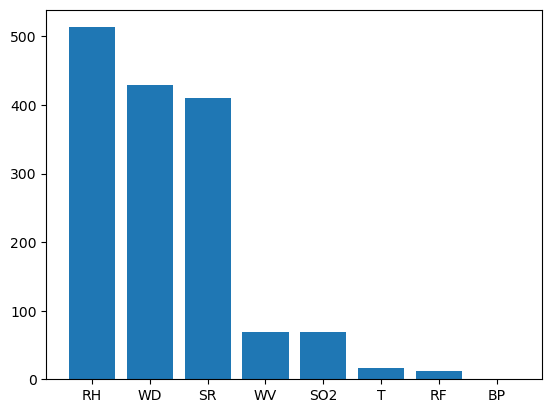

In [8]:
plt.figure()
plt.bar(df_results.index, df_results.f_value)
plt.show()

La humedad relativa, dirección del viento y radiación solar encabezan las variables más linealmente relacionadas con $\text{PM}_{10}$.

### Valor $R$ de correlación

La correlación ya se estudió en el capítulo pasado. También se puede utilizar como selección de características.

In [9]:
from sklearn.feature_selection import r_regression

In [10]:
r_value = r_regression(x, y)
r_value

array([ 0.00429029, -0.02537634, -0.1668546 ,  0.06184999,  0.14953169,
        0.02962669, -0.06202735,  0.15297872])

In [11]:
df_results['r_value'] = r_value
colors = []
for v in df_results['r_value']:
    if v > 0:
        colors.append('b')
    else:
        colors.append('r')

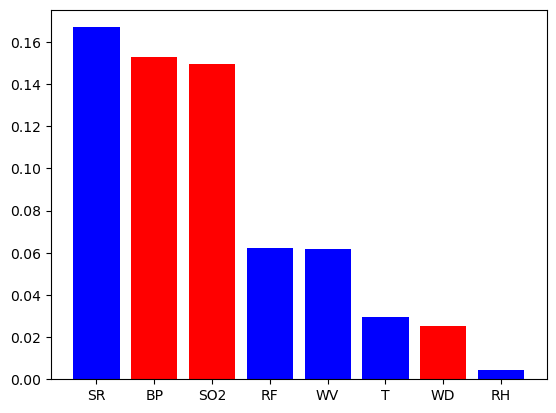

In [12]:
df_results['r_value_abs'] = df_results['r_value'].abs()
df_results.sort_values('r_value_abs', inplace = True, ascending = False)
plt.figure()
plt.bar(df_results.index, df_results.r_value_abs, color = colors)
plt.show()

### Umbral de varianza

Otro modelo de filtro para selección de características es el umbral de varianza, que consiste en descartar características con baja varianza, en el supuesto de que no aportan tanta información al modelo. Requiere que las características estén normalizadas.

In [13]:
# Normalización de variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled

,BP,RF,RH,SO2,SR,T,WV,WD
0,0.188017,0.0,0.555556,0.027985,0.002825,0.556541,0.052133,0.710306
1,0.190083,0.0,0.606061,0.026119,0.002825,0.540527,0.042654,0.671309
2,0.198347,0.0,0.595960,0.027052,0.002825,0.535846,0.061611,0.651811
3,0.247934,0.0,0.343434,0.026119,0.290019,0.642769,0.549763,0.091922
4,0.268595,0.0,0.282828,0.024254,0.589454,0.649667,0.620853,0.066852
...,...,...,...,...,...,...,...,...
17917,0.355372,0.0,0.434343,0.018657,0.031073,0.229860,0.151659,0.242340
17918,0.357438,0.0,0.353535,0.015858,0.440678,0.282582,0.094787,0.211699
17919,0.384298,0.0,0.262626,0.038246,0.417137,0.216556,0.004739,0.189415
17920,0.378099,0.0,0.242424,0.074627,0.500942,0.241685,0.009479,0.192201


In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([0.04436033, 0.00012109, 0.04147784, 0.00314576, 0.05527576,
       0.03085002, 0.02143292, 0.05844243])

In [16]:
# Se agregan las varianzas a los resultados
df_results['variance'] = selector.variances_
df_results.sort_values('variance', ascending = False, inplace = True)

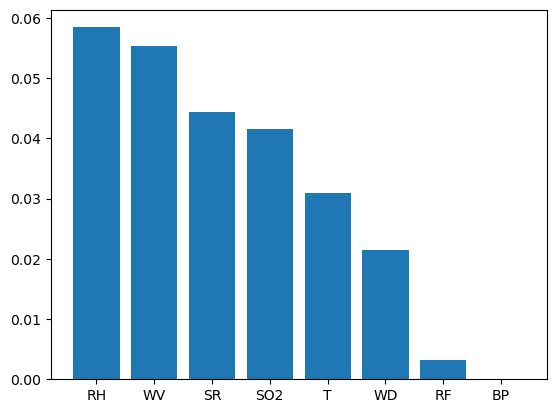

In [17]:
plt.figure()
plt.bar(df_results.index, df_results.variance)
plt.show()

Generalmente, se suelen eliminar características con varianza menor a $0.2$. Aquí todas serían eliminadas 😅

### Información mutua

Este modelo mide la dependencia entre variables. Un valor de $0$ indicaría que las variables son independientes. Este modelo captura relaciones no lineales entre las variables 👀

Aquí también existe la variante `classif` para modelos que impliquen clasificación.

In [18]:
from sklearn.feature_selection import mutual_info_regression

In [19]:
mi = mutual_info_regression(x, y, random_state=0)
mi

array([0.04086179, 0.02524216, 0.05176487, 0.04573864, 0.11309616,
       0.04497225, 0.02172313, 0.03296479])

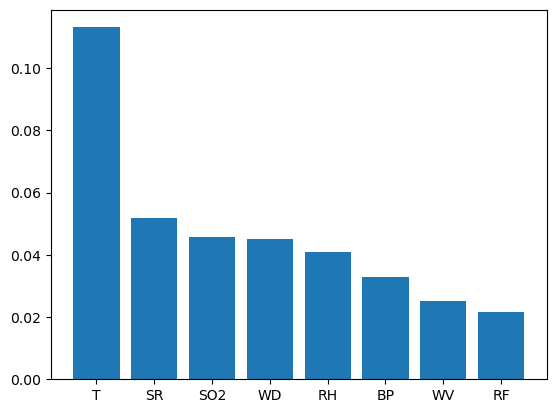

In [20]:
# Agregarlo a los resultados
df_results['mi'] = mi
df_results.sort_values('mi', ascending = False, inplace = True)

plt.figure()
plt.bar(df_results.index, df_results.mi)
plt.show()

Una vez que se tienen algunos resultados, es recomendable utilizar una métrica para tomar una decisión. Hay muchas maneras de hacer esto, por ejemplo mediante la media de los valores normalizados. De esta manera, tenemos sólo una variable de decisión.

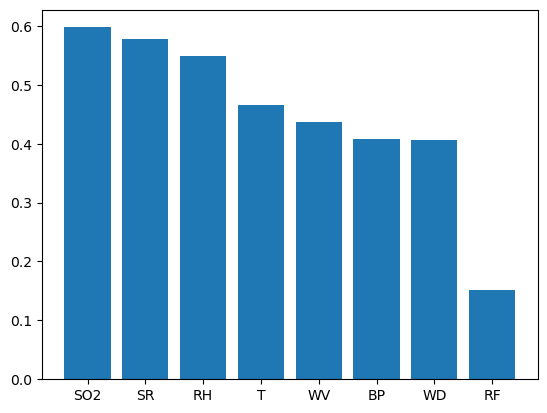

In [21]:
scaled = scaler.fit_transform(df_results)
df_results_scaled = pd.DataFrame(scaled, columns = df_results.columns)
df_results_scaled.set_index(df_results.index, inplace = True)
df_results_scaled['norm_mean'] = df_results_scaled.mean(axis = 1)
df_results_scaled.sort_values('norm_mean', ascending = False, inplace = True)

plt.figure()
plt.bar(df_results_scaled.index, df_results_scaled.mean(axis = 1))
plt.show()

## Métodos de envoltura (?) o *wrapper*

Métodos que exploran subconjuntos de combinaciones de características que mejoren algún desempeño de modelos de AA, con la ventaja de que, al usar un modelo, se estudian las relaciones de las carracterísticas *en* el modelo, a diferencia de los métodos de filtro, donde la relación de características dependía de estadísticos. Estos métodos tienen la desventaja de que, a mayor complejidad del modelo y número de características, mayor consumo de recursos y tiempos de ejecución ⌛

### Selección de características exhaustiva

La Selección de características exhaustiva o EFS (*Exhaustive Feature Selection*) por sus siglas en inglés evalúa todas las combinaciones de características y devuelve los valores que optimizan el modelo. Como ejemplo, se usa una regresión lineal.

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [25]:
lr = LinearRegression()

efs = EFS(estimator = lr,        # Use logistic regression as the classifier/estimator
          min_features = 1,      # The minimum number of features to consider is 1
          max_features = 8,      # The maximum number of features to consider is 4
          scoring='neg_mean_absolute_error',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)

In [26]:
efs = efs.fit(x, y)

Features: 255/255

In [27]:
print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

Best accuracy score: -26.37
Best subset (indices): (2, 4, 7)
Best subset (corresponding names): ('RH', 'SR', 'WD')


In [28]:
metric_dict = efs.get_metric_dict()
df_efs = pd.DataFrame(metric_dict).T
df_efs.sort_values('avg_score', ascending=False,  inplace = True)
df_efs_best_10 = df_efs.iloc[:10]
df_efs_best_10

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
78,"(2, 4, 7)","[-25.728949578055502, -27.385298136709626, -32...",-26.369325,"(RH, SR, WD)",5.737435,4.463919,2.23196
133,"(1, 2, 4, 7)","[-25.741550274805515, -27.38717729891836, -32....",-26.381235,"(RF, RH, SR, WD)",5.719986,4.450343,2.225172
149,"(2, 3, 4, 7)","[-25.6888798467293, -27.58811649664674, -32.59...",-26.393016,"(RH, SO2, SR, WD)",5.797148,4.510378,2.255189
199,"(1, 2, 3, 4, 7)","[-25.701730145300438, -27.588085316445486, -32...",-26.404812,"(RF, RH, SO2, SR, WD)",5.778485,4.495858,2.247929
32,"(4, 7)","[-25.47455561557264, -27.41607708316543, -33.5...",-26.430068,"(SR, WD)",6.419859,4.994869,2.497434
84,"(3, 4, 7)","[-25.42113251905091, -27.630513812115048, -33....",-26.451793,"(SO2, SR, WD)",6.484229,5.04495,2.522475
68,"(1, 4, 7)","[-25.493017862790005, -27.41582460100987, -33....",-26.45432,"(RF, SR, WD)",6.370997,4.956852,2.478426
154,"(2, 4, 5, 7)","[-25.68059038414948, -27.092131694263458, -33....",-26.47159,"(RH, SR, T, WD)",6.057916,4.713265,2.356632
139,"(1, 3, 4, 7)","[-25.440293574749283, -27.628347725981335, -33...",-26.476293,"(RF, SO2, SR, WD)",6.433246,5.005284,2.502642
204,"(1, 2, 4, 5, 7)","[-25.692639828231155, -27.10027643922127, -33....",-26.480765,"(RF, RH, SR, T, WD)",6.045907,4.703921,2.35196


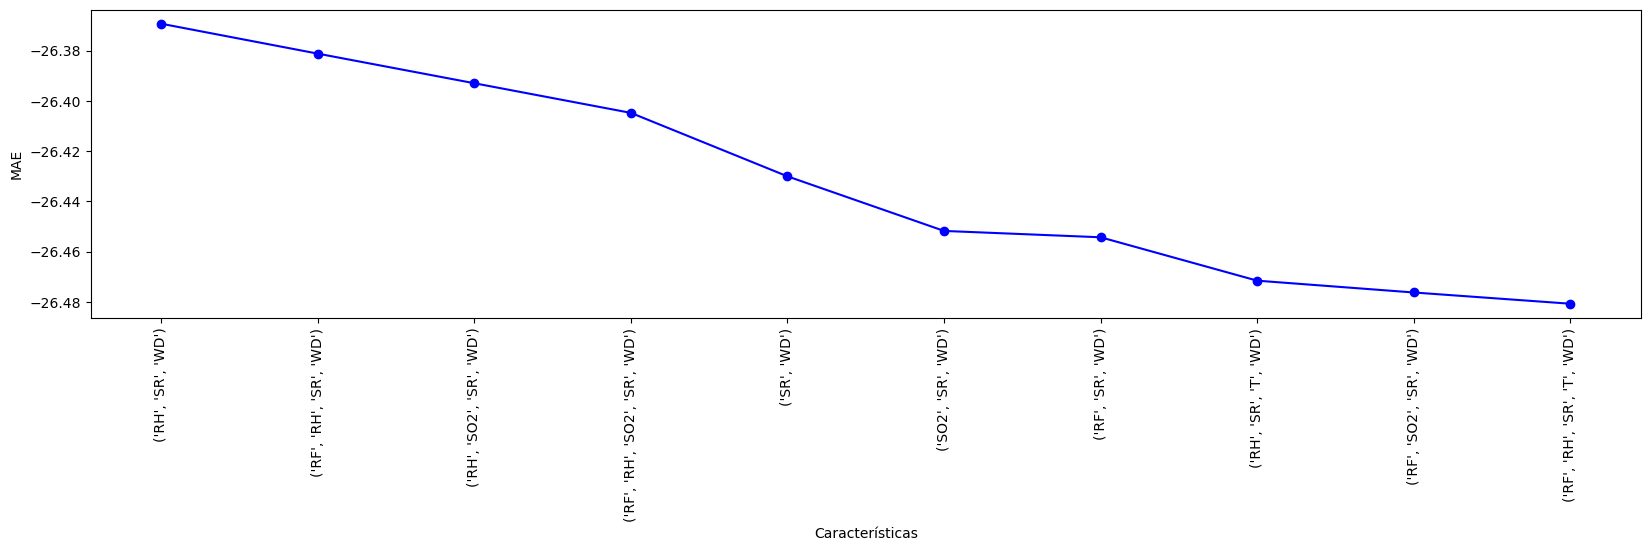

In [29]:
# https://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/#example-2-visualizing-the-feature-selection-results

fig = plt.figure(figsize=(20, 4))

plt.plot(
    df_efs_best_10.feature_names.astype(str), 
    df_efs_best_10.avg_score, 
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

### Sequential Forward Selection (SFS)

Este modelo agrega en cada iteración una variable e identifica las variables que mejoran la métrica del modelo.

In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [31]:
sfs = SFS(estimator = lr,        # Use logistic regression as the classifier/estimator
          k_features=(1, 8),  # Consider any feature combination between 1 and 8
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='neg_mean_absolute_error',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)

In [32]:
sfs = sfs.fit(x, y)

In [33]:
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

Best accuracy score: -26.37
Best subset (indices): (2, 4, 7)
Best subset (corresponding names): ('RH', 'SR', 'WD')


In [34]:
subsets_ = sfs.subsets_
df_sfs = pd.DataFrame(subsets_).T
df_sfs.sort_values('avg_score', ascending=False,  inplace = True)
df_sfs

,feature_idx,cv_scores,avg_score,feature_names
3,"(2, 4, 7)","[-25.728949578055502, -27.385298136709626, -32...",-26.369325,"(RH, SR, WD)"
4,"(1, 2, 4, 7)","[-25.741550274805515, -27.38717729891836, -32....",-26.381235,"(RF, RH, SR, WD)"
5,"(1, 2, 3, 4, 7)","[-25.701730145300438, -27.588085316445486, -32...",-26.404812,"(RF, RH, SO2, SR, WD)"
2,"(4, 7)","[-25.47455561557264, -27.41607708316543, -33.5...",-26.430068,"(SR, WD)"
6,"(1, 2, 3, 4, 5, 7)","[-25.65324782171129, -27.296998981479092, -33....",-26.510578,"(RF, RH, SO2, SR, T, WD)"
7,"(0, 1, 2, 3, 4, 5, 7)","[-27.521190324688256, -27.15814651575552, -32....",-26.672203,"(BP, RF, RH, SO2, SR, T, WD)"
1,"(4,)","[-26.983285424205068, -27.337453091432604, -33...",-26.879408,"(SR,)"
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[-26.79233001520056, -27.353004912191512, -32....",-26.93665,"(BP, RF, RH, SO2, SR, T, WV, WD)"


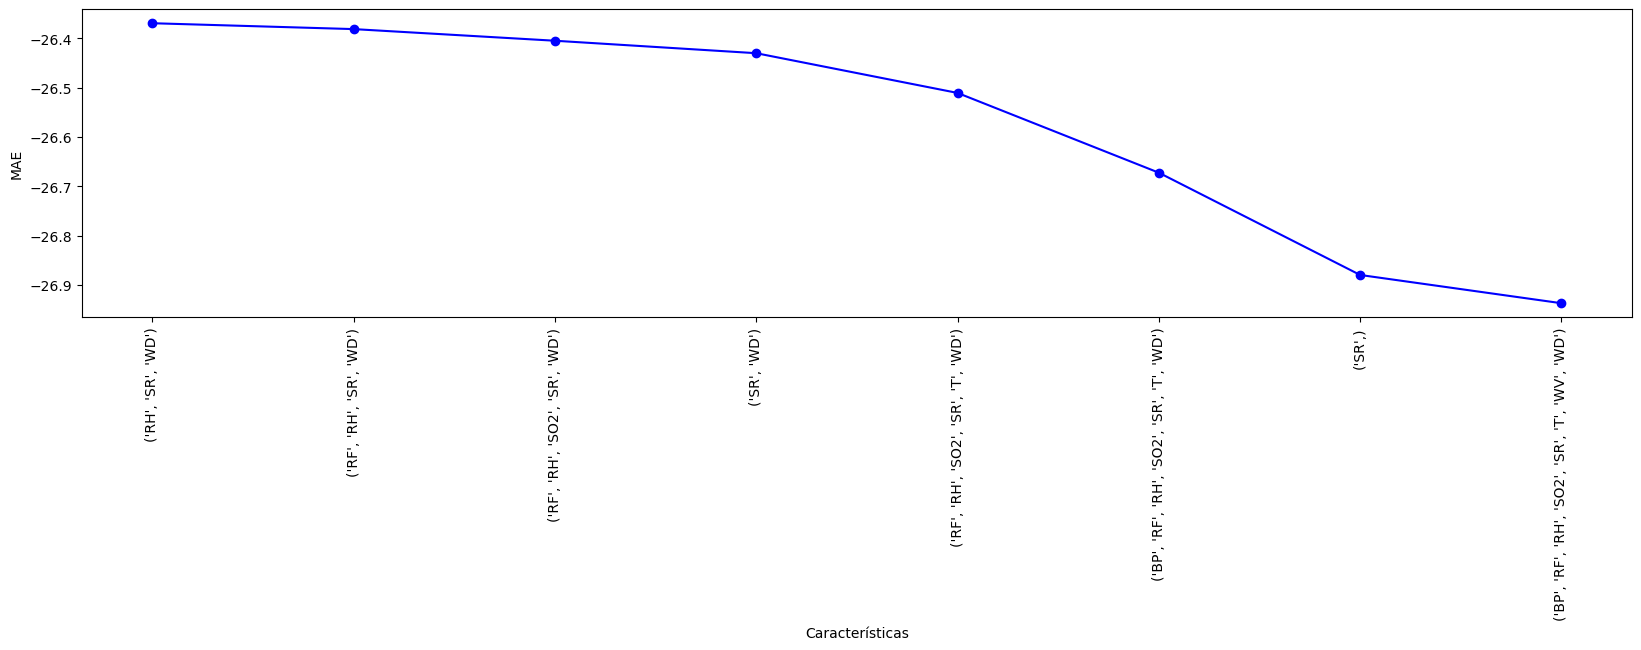

In [35]:
fig = plt.figure(figsize=(20, 4))

plt.plot(
    df_sfs.feature_names.astype(str), 
    df_sfs.avg_score, 
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

### Sequential Backward Selection (SBS)

Lo mismo, pero al revés 😛

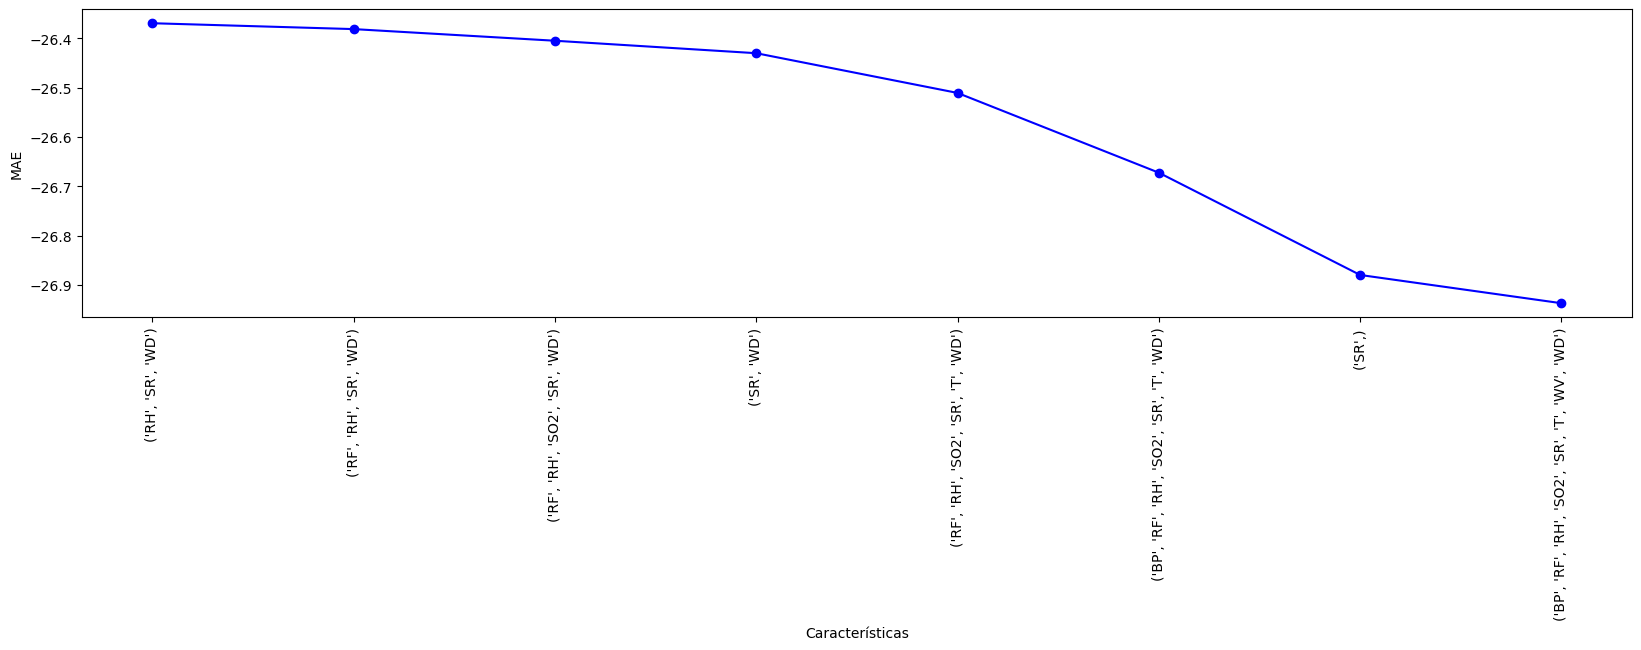

In [36]:
sbs = SFS(estimator = lr,
          k_features=(1, 8),
          forward=True,
          scoring='neg_mean_absolute_error',
          cv=5)

sbs = sbs.fit(x, y)
subsets_ = sbs.subsets_
df_sbs = pd.DataFrame(subsets_).T
df_sbs.sort_values('avg_score', ascending=False,  inplace = True)

fig = plt.figure(figsize=(20, 4))
plt.plot(
    df_sbs.feature_names.astype(str), 
    df_sbs.avg_score, 
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

## PCA

El [análisis de componentes principales](https://www.cienciadedatos.net/documentos/py19-pca-python.html) es una especie de técnica de reducción de características que podría utilizarse como selección de características. Consiste en reducir la dimensionalidad de características mediante hiperparámetros que incluyan las características que más varianza tengan para explicar un modelo.

In [97]:
from sklearn.decomposition import PCA
import numpy as np

In [90]:
pca = PCA(n_components=3)
pca_model = pca.fit(x_scaled)

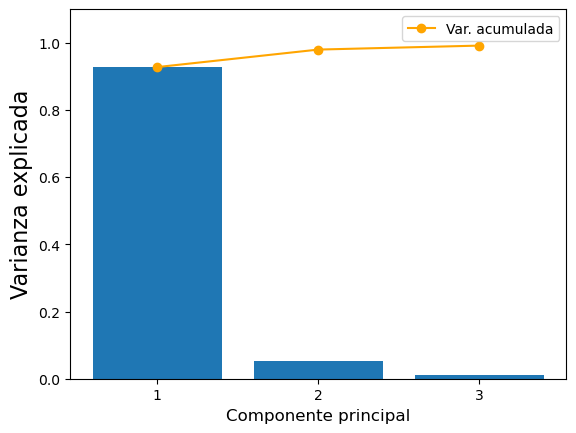

In [113]:
plt.figure()
plt.bar(np.arange(pca_model.n_components_) + 1, pca_model.explained_variance_ratio_)
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
plt.plot(range(1, 4),prop_varianza_acum, marker = 'o', c='orange', label='Var. acumulada')
plt.xticks(np.arange(pca_model.n_components_) + 1)
plt.ylim(0, 1.1)
plt.xlabel('Componente principal', fontsize=12)
plt.ylabel('Varianza explicada', fontsize=16)
plt.legend()
plt.show()

Para conocer los coeficientes que utiliza PCA para sus componentes, se puede hacer lo siguiente.

In [121]:
# Coeficientes del PCA
pca_coef = pd.DataFrame(
  data    = pca_model.components_,
  columns = x_scaled.columns,
  index = ['pca1', 'pca2', 'pca3']
).T.sort_values('pca1', ascending=False)
pca_coef

,pca1,pca2,pca3
WD,0.998834,0.026121,-0.039702
BP,0.038865,-0.097383,0.946602
RH,0.018499,-0.972513,-0.139062
SO2,0.001626,0.030966,0.163665
RF,0.000025,-0.000136,-0.000177
SR,-0.000480,0.005347,0.001192
WV,-0.010495,0.047643,-0.119113
T,-0.019125,0.201977,-0.205070


In [135]:
formula = ''
for i, r in pca_coef.iterrows():
    formula = formula +  str(round(r.pca1, 4)) + ' \text{' + i + '} + '
formula

'0.9988 \text{WD} + 0.0389 \text{BP} + 0.0185 \text{RH} + 0.0016 \text{SO2} + 0.0 \text{RF} + -0.0005 \text{SR} + -0.0105 \text{WV} + -0.0191 \text{T} + '

$$\text{PCA}_1 = 0.9988 \cdot \text{WD} + 0.0389 \cdot \text{BP} + 0.0185 \cdot \text{RH} + 0.0016 \cdot \text{SO2} + 0.0 \cdot \text{RF} + -0.0005 \cdot \text{SR} + -0.0105 \cdot \text{WV} + -0.0191 \.cdot \text{T}.$$

# [ ] Métodos embebidos

## Tarea en clase (2 puntos)

- Aplica algún método de filtro a tus datos mediante el uso de [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

## Tarea (8 puntos)

- Aplica los modelos de selección de características cuidando los supuestos de cada modelo
- Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)
- Con base en tu investigación, determina las características más relevantes de tu conjunto de datos
- Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección

# Referencias
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- https://neptune.ai/blog/feature-selection-methods
- https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning
- https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
- https://scikit-learn.org/stable/modules/feature_selection.html
- https://www.kaggle.com/code/ar2017/basics-of-feature-selection-with-python
- https://www.blog.trainindata.com/feature-selection-machine-learning-with-python/
- https://github.com/AutoViML/featurewiz ⭐